## Base Model with Data Augmentation

The dataset used for this involves each class having 50 training images and 10 testing images. All images are taken with the relay box at a fixed position.

Tensorflow 2.8> which is the default installation in Colab does not work with keras.preprocessing, that's why the first thing we do is ensure we have the correct TensorFlow version

In [1]:
#!pip uninstall tensorflow
!pip install tensorflow==2.7.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 665.5 MB 8.4 MB/s
     |████████████████████████████████| 463 kB 7.8 MB/s 
     |████████████████████████████████| 1.3 MB 41.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir




--2022-06-22 09:44:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-22 09:44:32 (43.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



Download and unzip images from my Drive

In [5]:
unzip_data("/content/drive/MyDrive/MyModelFixed.zip")


Remove any hidden files in the test/train directories





In [6]:
rmdir /content/MyModel/Train/.ipynb_checkpoints

rmdir: failed to remove '/content/MyModel/Train/.ipynb_checkpoints': No such file or directory


In [7]:
rmdir /content/MyModel/Test/.ipynb_checkpoints

rmdir: failed to remove '/content/MyModel/Test/.ipynb_checkpoints': No such file or directory


In [15]:
walk_through_dir("/content/MyModel")

There are 4 directories and 1 images in '/content/MyModel'.
There are 0 directories and 1 images in '/content/MyModel/__pycache__'.
There are 10 directories and 0 images in '/content/MyModel/test'.
There are 0 directories and 6 images in '/content/MyModel/test/Seven'.
There are 0 directories and 6 images in '/content/MyModel/test/Four'.
There are 0 directories and 6 images in '/content/MyModel/test/Three'.
There are 0 directories and 6 images in '/content/MyModel/test/One'.
There are 0 directories and 6 images in '/content/MyModel/test/Two'.
There are 0 directories and 8 images in '/content/MyModel/test/None'.
There are 0 directories and 6 images in '/content/MyModel/test/Eight'.
There are 0 directories and 6 images in '/content/MyModel/test/Five'.
There are 0 directories and 6 images in '/content/MyModel/test/Six'.
There are 0 directories and 6 images in '/content/MyModel/test/All'.
There are 10 directories and 0 images in '/content/MyModel/train'.
There are 0 directories and 50 image

In [16]:
# Create training and test directories
train_dir = "/content/MyModel/train/"
test_dir = "/content/MyModel/test/"

In [17]:
# Creating data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")


Found 500 files belonging to 10 classes.
Found 62 files belonging to 10 classes.


In [18]:
train_data.class_names

['All', 'Eight', 'Five', 'Four', 'None', 'One', 'Seven', 'Six', 'Three', 'Two']

In [19]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [20]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.1),
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomHeight(0.1),
    preprocessing.RandomWidth(0.1),
], name = "data_augmentation")

For comparative purposes, I've used the same hyperparameters for this model as was used for the Relay_Box_10_Classes model.

In [21]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

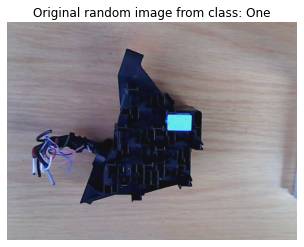

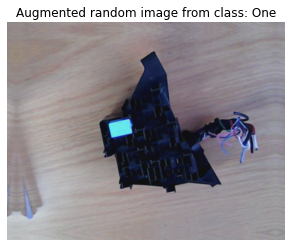

In [23]:
target_class = random.choice(train_data.class_names) #choose a random class
target_dir = "/content/MyModel/train/" +target_class #create teh target directory
os.listdir(target_dir)
random_image = random.choice(os.listdir(target_dir)) #choose random imagefrom target directory
random_image_path = target_dir+"/" + random_image #create chose random image path
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); 

#Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) #data augmentation requires shape (None,height,width,3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) #requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [24]:
initial_epochs=5

#setup the input and base model, freezing the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

#Add in data augmentation Sequential model as layer
x = data_augmentation(inputs)

#Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

#Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#Put a dense layer on as the output
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)

#Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#Fit the model 
history_1 = model_1.fit(train_data,
                                epochs = initial_epochs,
                                steps_per_epoch = len(train_data),
                                validation_data = test_data,
                                validation_steps = int(len(test_data)))
                                #callbacks = [create_tensorboard_callback("transfer_learning", "data_aug")])

16719872/16705208 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
16/16 [==============================] - 36s 2s/step - loss: 2.0021 - accuracy: 0.3300 - val_loss: 1.7484 - val_accuracy: 0.3710
Epoch 2/5
16/16 [==============================] - 29s 2s/step - loss: 1.4018 - accuracy: 0.6060 - val_loss: 1.3873 - val_accuracy: 0.7097
Epoch 3/5
16/16 [==============================] - 29s 2s/step - loss: 1.0696 - accuracy: 0.8140 - val_loss: 1.2023 - val_accuracy: 0.6935
Epoch 4/5
16/16 [==============================] - 28s 2s/step - loss: 0.8775 - accuracy: 0.8400 - val_loss: 1.0928 - val_accuracy: 0.6452
Epoch 5/5
16/16 [==============================] - 30s 2s/step - loss: 0.7398 - accuracy: 0.9400 - val_loss: 0.9875 - val_accuracy: 0.7258


In [25]:
model_1.evaluate(test_data)

2/2 [==============================] - 3s 1s/step - loss: 0.9875 - accuracy: 0.7258


[0.9875179529190063, 0.725806474685669]

In [26]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

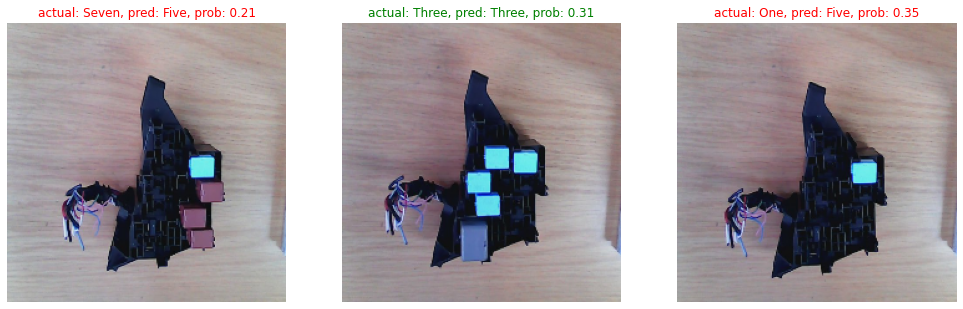

In [27]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
class_names = test_data.class_names
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);


##Fine-Tuned Model

In [28]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-30]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:

# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_2= model_1.fit(train_data,
                       epochs=fine_tune_epochs,
                       validation_data=test_data,
                       initial_epoch=history_1.epoch[-1], # start from previous last epoch
                       validation_steps=int(len(test_data)))
                       #callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately

Epoch 5/10
16/16 [==============================] - 42s 2s/step - loss: 0.4202 - accuracy: 0.9560 - val_loss: 0.6076 - val_accuracy: 0.8548
Epoch 6/10
16/16 [==============================] - 35s 2s/step - loss: 0.1841 - accuracy: 0.9640 - val_loss: 0.4482 - val_accuracy: 0.8548
Epoch 7/10
16/16 [==============================] - 34s 2s/step - loss: 0.1298 - accuracy: 0.9560 - val_loss: 0.3740 - val_accuracy: 0.8548
Epoch 8/10
16/16 [==============================] - 35s 2s/step - loss: 0.0957 - accuracy: 0.9760 - val_loss: 0.3201 - val_accuracy: 0.9032
Epoch 9/10
16/16 [==============================] - 34s 2s/step - loss: 0.0685 - accuracy: 0.9820 - val_loss: 0.3394 - val_accuracy: 0.9032
Epoch 10/10
16/16 [==============================] - 33s 2s/step - loss: 0.0384 - accuracy: 0.9960 - val_loss: 0.3100 - val_accuracy: 0.9032


Looks like we've outperformed the Relay_Box_10_classes model as expected. However, the 100% validation accuracy evaded this model as well.


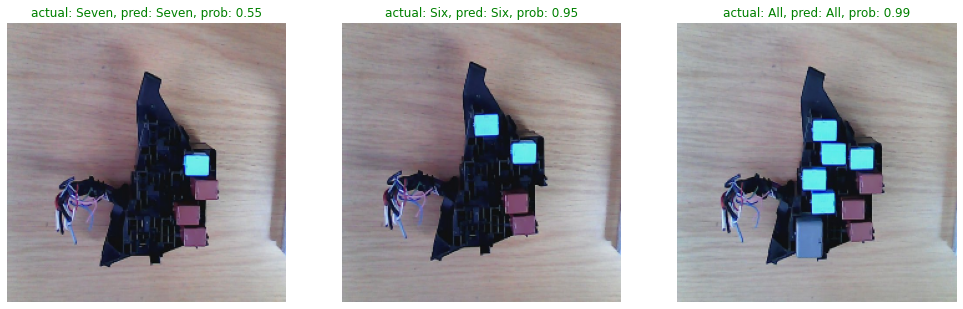

In [35]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
class_names = test_data.class_names
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);


In [31]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.33000001311302185, 0.6060000061988831, 0.8140000104904175, 0.8399999737739563, 0.9399999976158142, 0.9559999704360962, 0.9639999866485596, 0.9559999704360962, 0.9760000109672546, 0.9819999933242798, 0.9959999918937683]


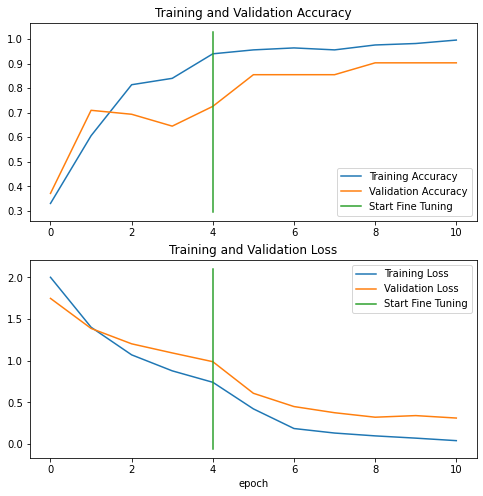

In [32]:
compare_historys(original_history=history_1, 
                 new_history=history_2, 
                 initial_epochs=5)

My suspicion is that we're lacking images. We need more data to train on.